## Red Neuronal Básica para Regresión con Keras

In [7]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Generar un dataset sintético
Datos artificiales que simulan problemas de clasificación.

- n_samples=100: Genera 100 ejemplos (filas).
- n_features=1: Cada ejemplo tiene 1 sola característica (columna).
- noise=15: Agrega ruido gaussiano (error) al valor de salida y. Esto simula datos reales con imprecisiones.
- random_state=42: Fija la semilla aleatoria para que los datos generados sean siempre los mismos (reproducibilidad).


In [2]:
# Generar 100 muestras de 1 caracteristica. incluir ruido.
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

## Visualización de los datos

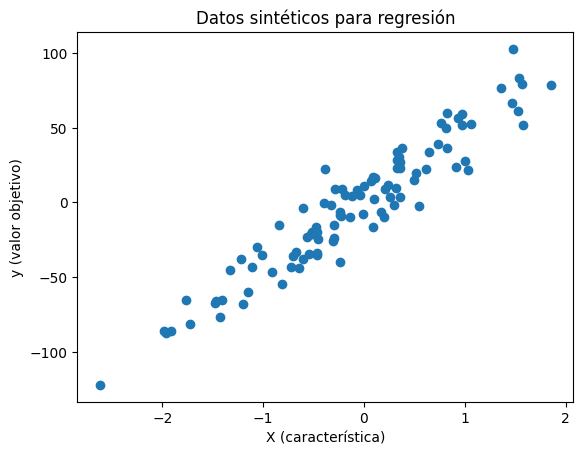

In [3]:
plt.scatter(X, y)
plt.title("Datos sintéticos para regresión")
plt.xlabel("X (característica)")
plt.ylabel("y (valor objetivo)")
plt.show()

# Dividir en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Establecer estandarización y regresión

In [5]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir la red neuronal para regresión
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

/home/jclondonol/Documents/EAFIT/AppliedML-Course/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1743081614.246875   36268 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Entrenar el modelo

In [6]:
model.compile(optimizer=Adam(0.01), loss='mse')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

## Evaluar

In [8]:
y_pred = model.predict(X_test)
print("Error absoluto medio (MAE):", mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente R2:", r2_score(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Error absoluto medio (MAE): 12.550360905424098
Error cuadrático medio (MSE): 247.19815947672785
Coeficiente R2: 0.8726133789703895


## Visualización de la curva de predicción

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


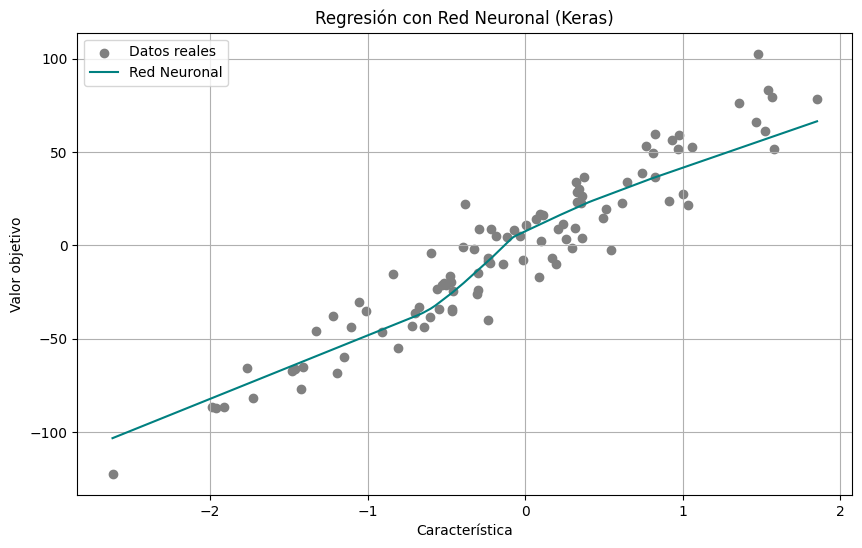

In [9]:
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)
y_plot = model.predict(X_plot_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='gray', label='Datos reales')
plt.plot(X_plot, y_plot, color='teal', label='Red Neuronal')
plt.title("Regresión con Red Neuronal (Keras)")
plt.xlabel("Característica")
plt.ylabel("Valor objetivo")
plt.legend()
plt.grid(True)
plt.show()

## Visualización del vecindario para un ejemplo.

In [11]:
index = 0 
punto_test = X_test[index].reshape(1, -1)
distancias = np.linalg.norm(X_train - punto_test, axis=1)
indices_vecinos = distancias.argsort()[:5] 
punto_predicho = model.predict(X_test[index].reshape(1, -1))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


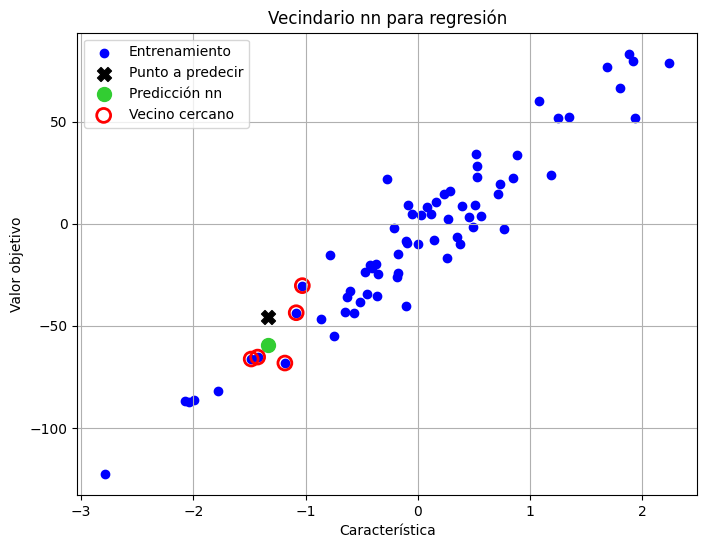

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test[index], y_test[index], color='black', marker='X', s=100, label='Punto a predecir')
plt.scatter(X_test[index], punto_predicho, color='limegreen', marker='o', s=100, label='Predicción nn')
for i in indices_vecinos:
    plt.scatter(X_train[i], y_train[i], edgecolor='red', facecolor='none', s=100, linewidth=2, label='Vecino cercano' if i == indices_vecinos[0] else "")
plt.title("Vecindario nn para regresión")
plt.xlabel("Característica")
plt.ylabel("Valor objetivo")
plt.legend()
plt.grid(True)
plt.show()

## Ejercicios
- Cambiar el número de neuronas o capas ocultas.
- Probar funciones de activación distintas (tanh, elu).